# FASE 1 - DATA STORAGE 

## IMPORT DATASETS

In [ ]:
%pip install -r requirements.txt;

In [63]:
import pandas as pd;
import numpy as np 
import pycountry as pc
from pyspark.sql import SparkSession

import matplotlib.pyplot as plt
import seaborn as sns


from couchbase.auth import PasswordAuthenticator
from couchbase.cluster import Cluster
from couchbase.options import ClusterOptions, QueryOptions
from couchbase.auth import PasswordAuthenticator
from couchbase.cluster import Cluster
from couchbase.options import ClusterOptions, QueryOptions
from couchbase.bucket import Bucket
from couchbase.management.buckets import CreateBucketSettings

import os
from dotenv import load_dotenv
from datetime import datetime 
from datetime import timedelta
import time
import requests

### Couchbase db setup
load_dotenv();

In [64]:
#DATASETS ESCOLHIDOS

dfLabor = pd.read_csv('datasets/world_labor_productivity.csv', delimiter=',')
#To change for the original dataset
# dfSalary = pd.read_csv('datasets/world_annual_wage.csv', delimiter=',')
dfSalary = pd.read_csv('datasets/world_annual_wage_usd.csv', delimiter=',')
dfMental=pd.read_csv('datasets/mental_illness.csv', delimiter=',')
dfCost = pd.read_csv('datasets/cost_of_living.csv', delimiter=',')

In [65]:
dfLabor

,Entity,Code,Year,Productivity: output per hour worked
0,Argentina,ARG,1972,5.770799
1,Argentina,ARG,1973,6.049992
2,Argentina,ARG,1974,6.123540
3,Argentina,ARG,1975,6.015602
4,Argentina,ARG,1976,6.029272
...,...,...,...,...
3452,Vietnam,VNM,2015,4.946606
3453,Vietnam,VNM,2016,5.156925
3454,Vietnam,VNM,2017,5.652919
3455,Vietnam,VNM,2018,5.982665


In [66]:
dfMental

,Entity,Code,Year,"DALYs from depressive disorders per 100,000 people in, both sexes aged age-standardized","DALYs from schizophrenia per 100,000 people in, both sexes aged age-standardized","DALYs from bipolar disorder per 100,000 people in, both sexes aged age-standardized","DALYs from eating disorders per 100,000 people in, both sexes aged age-standardized","DALYs from anxiety disorders per 100,000 people in, both sexes aged age-standardized"
0,Afghanistan,AFG,1990,895.22565,138.248250,147.64412,26.471115,440.33000
1,Afghanistan,AFG,1991,893.88434,137.761220,147.56696,25.548681,439.47202
2,Afghanistan,AFG,1992,892.34973,137.080300,147.13086,24.637949,437.60718
3,Afghanistan,AFG,1993,891.51587,136.486020,146.78812,23.863169,436.69104
4,Afghanistan,AFG,1994,891.39160,136.183230,146.58481,23.189074,436.76800
...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,546.46204,127.108720,115.32073,20.423056,302.20868
6836,Zimbabwe,ZWE,2016,547.27765,127.142105,114.98700,20.647228,302.68216
6837,Zimbabwe,ZWE,2017,547.62270,127.465050,115.32798,20.791725,302.88626
6838,Zimbabwe,ZWE,2018,546.57184,127.681210,115.42796,20.916480,301.58250


In [67]:
dfSalary

,Country,Year,Unit Code,Salary,Exchange Rate
0,Australia,2000,AUD,28513.655872,1.621920
1,Australia,2001,AUD,28017.142438,1.724515
2,Australia,2002,AUD,27800.292208,1.800440
3,Australia,2003,AUD,31325.628295,1.653553
4,Australia,2004,AUD,30771.302385,1.761362
...,...,...,...,...,...
2604,Costa Rica,2017,CRC,41.006993,658.912007
2605,Costa Rica,2018,CRC,40.769202,679.655193
2606,Costa Rica,2019,CRC,44.836115,636.183580
2607,Costa Rica,2020,CRC,42.792858,732.388565


In [68]:
dfCost

,Date,Country,Cost of Living,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,2023,Bermuda,141.8,96.3,120.0,143.3,142.0,79.5
1,2023,Switzerland,114.2,50.2,83.5,113.9,109.5,118.7
2,2023,Cayman Islands,103.4,75.7,90.1,96.4,92.4,76.7
3,2023,Bahamas,90.9,39.6,66.3,74.1,94.8,43.2
4,2023,Barbados,88.8,21.2,56.4,80.1,82.7,36.8
...,...,...,...,...,...,...,...,...
1626,2009,Bolivia,46.7,21.8,36.8,27.1,37.2,32.5
1627,2009,China,43.5,25.1,36.2,58.4,35.2,35.0
1628,2009,Thailand,39.9,24.5,33.8,53.3,25.3,33.4
1629,2009,India,38.5,10.5,27.4,34.0,29.5,41.4


## TRATAMENTO

In [69]:
print(dfSalary.columns)

Index(['Country', 'Year', 'Unit Code', 'Salary', 'Exchange Rate'], dtype='object')


Como é possível observar, o dfSalary tem a feature 'Year' como 'Time' e a feature 'Entity' como 'Country'. De forma a uniformizar e poder fazer um merge correto, decidimos renomear as colunas.
É possível verificar que tem algumas colunas em duplicado pelo que demos drop delas

In [70]:
dfMental.rename(columns={'Entity':'Country'}, inplace=True)
dfMental.rename(columns={'DALYs from depressive disorders per 100,000 people in, both sexes aged age-standardized':'DALYs from depressive disorders per 100,000 people'}, inplace=True)
dfMental.rename(columns={'DALYs from bipolar disorder per 100,000 people in, both sexes aged age-standardized':'DALYs from bipolar disorder per 100,000 people'}, inplace=True)
dfMental.rename(columns={'DALYs from schizophrenia per 100,000 people in, both sexes aged age-standardized':'DALYs from schizophrenia per 100,000 people'}, inplace=True)
dfMental.rename(columns={'DALYs from eating disorders per 100,000 people in, both sexes aged age-standardized':'DALYs from eating disorders per 100,000 people'}, inplace=True)
dfMental.rename(columns={'DALYs from anxiety disorders per 100,000 people in, both sexes aged age-standardized':'DALYs from anxiety disorders per 100,000 people'}, inplace=True)

In [71]:
dfLabor.rename(columns={"Entity": "Country"}, inplace=True)
dfLabor.drop(columns=['Code'], inplace=True)
dfLabor.rename(columns={'Productivity: output per hour worked':'Productivity'}, inplace=True)

In [72]:
#TODO: Change and uncomment, we are going to use the filtered dataset to not spend all the credits from the api

# #COUNTRY,"Country","SERIES","Series","TIME","Time","Unit Code","Unit","PowerCode Code","PowerCode","Reference Period Code","Reference Period","Value","Flag Codes","Flags"
# dfSalary.drop(columns=[ 'COUNTRY' , "Flag Codes", "Flags", "SERIES", "Series", "Unit", "PowerCode", "PowerCode Code","Reference Period Code", "Reference Period"], inplace=True)
# dfSalary.rename(columns={'Value':'Salary'}, inplace=True)
# dfSalary.rename(columns={'PowerCode':'Unit Code'}, inplace=True)
# dfSalary.rename(columns={'Time':'Year'}, inplace=True)
# dfSalary.drop(columns=[ 'TIME' ], inplace=True)

In [73]:
dfCost.rename(columns={'Date':'Year'}, inplace=True)
dfCost.rename(columns={'Cost of Living':'CoL'}, inplace=True)
#Should we merge the collumns Rent index and Groceries index and rename it to Basic Needs Index and the Restaurant Index to Leisure Index

In [74]:
#Lets list all the collumn names
print("Labor dataset collumns:  "+str(dfLabor.columns))
print("Salary dataset collumns: "+str(dfSalary.columns))
print("Mental Illness dataset collumns: "+str(dfMental.columns))
print("Cost of Living dataset collumns: "+str(dfCost.columns))

Labor dataset collumns:  Index(['Country', 'Year', 'Productivity'], dtype='object')
Salary dataset collumns: Index(['Country', 'Year', 'Unit Code', 'Salary', 'Exchange Rate'], dtype='object')
Mental Illness dataset collumns: Index(['Country', 'Code', 'Year',
       'DALYs from depressive disorders per 100,000 people',
       'DALYs from schizophrenia per 100,000 people',
       'DALYs from bipolar disorder per 100,000 people',
       'DALYs from eating disorders per 100,000 people',
       'DALYs from anxiety disorders per 100,000 people'],
      dtype='object')
Cost of Living dataset collumns: Index(['Year', 'Country', 'CoL', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')


In [75]:
#Lets check the dates of the datasets
print("Labor dataset dates:  "+str(sorted(dfLabor['Year'].unique())))
print("Salary dataset dates: "+str(sorted(dfSalary['Year'].unique())))
print("Mental Illness dataset dates: "+str(sorted(dfMental['Year'].unique())))
print("Cost of Living dataset dates: "+str(sorted(dfCost['Year'].unique())))

#Only Turkey, Colombia and Costa Rica had no unitCode, we will manually add the unit code and country code for these countries
dfSalary.loc[dfSalary['Country'] == 'Türkiye', 'Unit Code'] = 'TRY'
dfSalary.loc[dfSalary['Country'] == 'Colombia', 'Unit Code'] = 'COP'
dfSalary.loc[dfSalary['Country'] == 'Costa Rica', 'Unit Code'] = 'CRC'


Labor dataset dates:  [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Salary dataset dates: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Mental Illness dataset dates: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Cost of Living dataset dates: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [78]:
def exchange():
    API_KEY = os.getenv("EXAPI_KEY")

    #Now we dont have any countries without unit code
    print(len(dfSalary[dfSalary['Unit Code'].isna()]["Country"].unique()))
    # Lets use the Unit Code to get the exchange rates for each country
    # Lets collect all the Unit Codes for the countries per year
    unitCodesPerYear = {}
    for year in dfSalary['Year'].unique():
        unitCodesPerYear[year] = dfSalary[dfSalary['Year'] == year]['Unit Code'].unique().tolist()


    #Lets create a new collumn to store the exchange rates it may become usefull later if a country doesnt have a exchange rate from the api we will use the latest one available to calculate the salary in USD
    dfSalary['Exchange Rate'] = 0
    for year in unitCodesPerYear:
        apiUrl = f"http://api.exchangeratesapi.io/v1/{str(year)}-12-12?access_key={API_KEY}&symbols=USD,{','.join(unitCodesPerYear[year])}"
        response = requests.get(apiUrl)
        if response.status_code !=200:
            break
        exchangeRates = response.json()
        
        for index, row in dfSalary[dfSalary['Year'] == year].iterrows():
            entity = row['Country']
            unitCode = row['Unit Code']
            salary = row['Salary']
            if unitCode in exchangeRates['rates']:
                exchangeRate = exchangeRates['rates'][unitCode]
                salaryInUSD = salary / exchangeRate
                dfSalary.at[index, 'Salary'] = salaryInUSD
                dfSalary.at[index, 'Exchange Rate'] = float(exchangeRate)
            else:
                latest_exchange_rate = None
                for code, rate in exchangeRates['rates'].items():
                    if code in unitCodesPerYear[year]:
                        latest_exchange_rate = rate
                        break
                if latest_exchange_rate is not None:
                    salaryInUSD = salary / latest_exchange_rate
                    dfSalary.at[index, 'Salary'] = salaryInUSD
                    dfSalary.at[index, 'Exchange Rate'] = float(latest_exchange_rate)
    
    dfSalary.drop(columns=['Unit Code'], inplace=True)
    dfSalary.drop(columns=['Exchange Rate'], inplace=True)
    print("Exchanged successfully")


In [79]:
dfSalary

,Country,Year,Unit Code,Salary,Exchange Rate
0,Australia,2000,AUD,28513.655872,1.621920
1,Australia,2001,AUD,28017.142438,1.724515
2,Australia,2002,AUD,27800.292208,1.800440
3,Australia,2003,AUD,31325.628295,1.653553
4,Australia,2004,AUD,30771.302385,1.761362
...,...,...,...,...,...
2604,Costa Rica,2017,CRC,41.006993,658.912007
2605,Costa Rica,2018,CRC,40.769202,679.655193
2606,Costa Rica,2019,CRC,44.836115,636.183580
2607,Costa Rica,2020,CRC,42.792858,732.388565


In [80]:
dfCost

,Year,Country,CoL,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,2023,Bermuda,141.8,96.3,120.0,143.3,142.0,79.5
1,2023,Switzerland,114.2,50.2,83.5,113.9,109.5,118.7
2,2023,Cayman Islands,103.4,75.7,90.1,96.4,92.4,76.7
3,2023,Bahamas,90.9,39.6,66.3,74.1,94.8,43.2
4,2023,Barbados,88.8,21.2,56.4,80.1,82.7,36.8
...,...,...,...,...,...,...,...,...
1626,2009,Bolivia,46.7,21.8,36.8,27.1,37.2,32.5
1627,2009,China,43.5,25.1,36.2,58.4,35.2,35.0
1628,2009,Thailand,39.9,24.5,33.8,53.3,25.3,33.4
1629,2009,India,38.5,10.5,27.4,34.0,29.5,41.4


In [81]:
print(dfSalary.columns)
print(dfLabor.columns) 
print(dfMental.columns) 
print(dfCost.columns)

Index(['Country', 'Year', 'Unit Code', 'Salary', 'Exchange Rate'], dtype='object')
Index(['Country', 'Year', 'Productivity'], dtype='object')
Index(['Country', 'Code', 'Year',
       'DALYs from depressive disorders per 100,000 people',
       'DALYs from schizophrenia per 100,000 people',
       'DALYs from bipolar disorder per 100,000 people',
       'DALYs from eating disorders per 100,000 people',
       'DALYs from anxiety disorders per 100,000 people'],
      dtype='object')
Index(['Year', 'Country', 'CoL', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')


In [82]:
print("Labor dataset dates:  "+str(sorted(dfLabor['Year'].unique())))
print("Salary dataset dates: "+str(sorted(dfSalary['Year'].unique())))
print("Mental Illness dataset dates: "+str(sorted(dfMental['Year'].unique())))
print("Cost of Living dataset dates: "+str(sorted(dfCost['Year'].unique())))


Labor dataset dates:  [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Salary dataset dates: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Mental Illness dataset dates: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Cost of Living dataset dates: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


## MERGE THE DATASETS USING PANDAS

In [83]:
start_time = time.time()
merged_df = pd.merge(dfCost, dfLabor, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, dfMental, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, dfSalary, on=['Country', 'Year'], how='inner')
end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed time:", elapsed_time, "seconds")

Elapsed time: 0.007589817047119141 seconds


In [84]:
merged_df

,Year,Country,CoL,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Productivity,Code,"DALYs from depressive disorders per 100,000 people","DALYs from schizophrenia per 100,000 people","DALYs from bipolar disorder per 100,000 people","DALYs from eating disorders per 100,000 people","DALYs from anxiety disorders per 100,000 people",Unit Code,Salary,Exchange Rate
0,2019,Switzerland,121.2,50.2,87.1,120.8,123.1,129.7,82.918655,CHE,635.31090,178.67760,202.48970,107.115810,650.54030,CHF,80501.214284,1.101884
1,2019,Switzerland,121.2,50.2,87.1,120.8,123.1,129.7,82.918655,CHE,635.31090,178.67760,202.48970,107.115810,650.54030,CHF,82253.667355,1.101884
2,2019,Switzerland,121.2,50.2,87.1,120.8,123.1,129.7,82.918655,CHE,635.31090,178.67760,202.48970,107.115810,650.54030,USD,63642.353379,1.118579
3,2019,Iceland,101.9,48.3,76.1,92.1,111.8,91.8,64.244220,ISL,485.75662,177.96698,195.80510,96.615060,489.77250,ISK,80314.306626,136.701286
4,2019,Iceland,101.9,48.3,76.1,92.1,111.8,91.8,64.244220,ISL,485.75662,177.96698,195.80510,96.615060,489.77250,ISK,92554.279263,136.701286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,2009,Mexico,54.2,22.4,41.6,40.0,48.7,42.9,19.709696,MEX,610.59094,181.27681,198.06451,50.877518,352.22714,MXN,11836.286902,18.960169
1058,2009,Mexico,54.2,22.4,41.6,40.0,48.7,42.9,19.709696,MEX,610.59094,181.27681,198.06451,50.877518,352.22714,USD,12804.494850,1.468703
1059,2009,Poland,53.5,34.8,46.1,40.7,44.6,26.9,25.316256,POL,317.68677,187.14354,119.24043,35.298910,298.42096,PLN,9321.037129,4.126043
1060,2009,Poland,53.5,34.8,46.1,40.7,44.6,26.9,25.316256,POL,317.68677,187.14354,119.24043,35.298910,298.42096,PLN,13431.270590,4.126043


## MERGE THE DATASETS USING PYSPARK 

In [ ]:
from pyspark.sql import SparkSession

start_time = time.time()
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Merge Datasets") \
    .getOrCreate()

merged_df = dfSalary.merge(dfCost, on=['Year', 'Entity'], how='inner')
merged_df = merged_df.merge(dfMental, on=['Year', 'Entity'], how='inner')
merged_df = merged_df.merge(dfLabor, on=['Year', 'Entity'], how='inner')
print(merged_df)

# Stop SparkSession
spark.stop()

end_time = time.time()
elapsed_time = end_time - start_time

print("Elapsed time:", elapsed_time, "seconds")



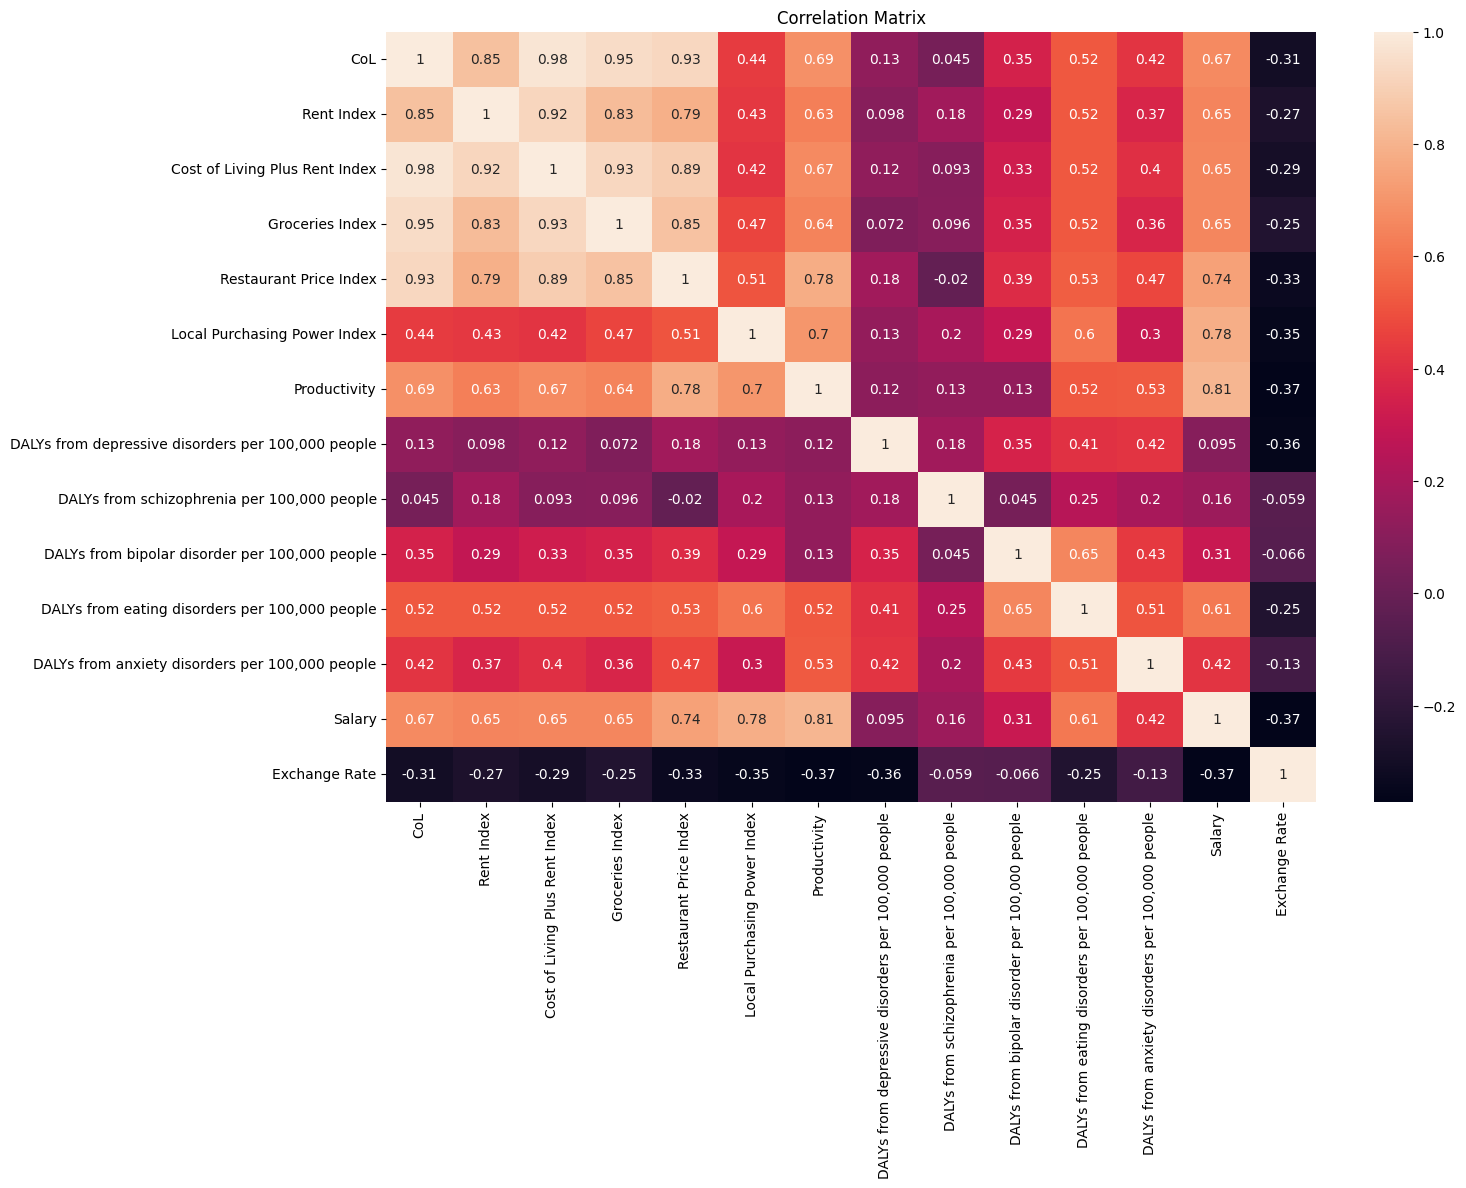

In [89]:
#Lets drop the collumns that wont add value to the analysis
correlationDF = merged_df.drop(columns=['Year', 'Country', 'Code', "Unit Code"])
#Lets apply a correlation matrix to determine if any data is correlated
correlation_matrix = correlationDF.corr()
#Plot the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Now we are going to the next step in the pipeline that is the storage
We will use Couchbase db and we will benchmark what would be the better option, storing the documents(each dataset) individually or merge them by running the same queries on both options

In [90]:

couchbaseUsername, couchbasePassword = os.getenv('COUCHBASE_USERNAME'), os.getenv('COUCHBASE_PASSWORD')


# get a reference to our cluster
auth = PasswordAuthenticator(couchbaseUsername, couchbasePassword)
cluster = Cluster.connect('couchbase://127.0.0.1', ClusterOptions(auth))


#Datasets structure:
#[(bucket_name, dataset)]
def db_populator(datasets, options=None):
    for i in datasets:
        bucketName, dataset = i
        if options!=None:
            bucketSettings = CreateBucketSettings(name=options["name"], 
                                                bucket_type=options["bucket_type"], 
                                                ram_quota_mb=options["ram_quota_mb"], 
                                                max_expiry=options["max_expiry"], 
                                                compression_mode=options["compression_mode"], 
                                                conflict_resolution_type=options["conflict_resolution_type"])
        else:
            bucketSettings = CreateBucketSettings(name=bucketName, 
                                                bucket_type="couchbase", 
                                                ram_quota_mb=500, 
                                                max_expiry=0, 
                                                compression_mode="passive", 
                                                conflict_resolution_type="seqno")
            
        
        print(f"Populating {bucketName} with {len(dataset)} documents")
        #Create the bucket to store the files
        try: 
            cluster.buckets().create_bucket(bucketSettings, name='world_data')
            print('Bucket created')
            cluster.wait_until_ready(timedelta(seconds=20))
            #TODO: Rever isto, por vezes parte visto que pode demorar mais a criar o bucket

        except Exception as e:
            if "Bucket with given name already exists" in str(e):
                pass

        #Lets create a new collection to store the data
        bucket = cluster.bucket(bucketName)
        collection = bucket.default_collection()

        #Lets store the data in the collection
        #Lets store the data in the collection
        #Lets get the last id in the bucket
        i=0
        for row in dataset.iterrows():
            data = row[1].to_dict()
            #Rever se este id é necessário visto que depois corremos o create_primary_index
            data["_id"] = f"{i}"
            collection.upsert(str(i), data)
            i+=1

        print('Data stored')
        #Lets create the index for the data
        try:
            cluster.query_indexes().create_primary_index(bucketName)
            print('Index created')
        except Exception as e:
            if "already exists" in str(e):
                pass    


def runBenchmarks():
    #Lets make some queries to the data
    agregationQuerySingleBucket = f"""
    SELECT `Country`,
        Year,
        AVG(`CoL`) AS Avg_CoL,
        MEDIAN(`CoL`) AS Median_CoL
    FROM `world_data`
    GROUP BY `Country`,
            Year
    ORDER BY RANDOM();
    """

    timeBeforeQuery = datetime.now()
    cluster.query(agregationQuerySingleBucket)
    timeAfterQuery = datetime.now()
    print(f"Time to run agregation query in the merged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")

    agregationQueryMultipleBucket = f"""
    SELECT `Country`,
        Year,
        AVG(`CoL`) AS Avg_CoL,
        MEDIAN(`CoL`) AS Median_CoL
    FROM `cost_of_living`
    GROUP BY `Country`,
            Year
    ORDER BY RANDOM();
    """

    timeBeforeQueryMB = datetime.now()
    cluster.query(agregationQueryMultipleBucket)
    timeAfterQueryMB= datetime.now()
    print(f"Time to run agregation query in the datasets: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
    print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
    print("---------------------------------------")

    yearQuerySingleBucket = f"""
        SELECT Year,
            AVG(`CoL`) AS Mean_Cost_of_Living
        FROM `world_data`
        GROUP BY Year
        ORDER BY RANDOM()
        """

    timeBeforeQuery = datetime.now()
    cluster.query(agregationQuerySingleBucket)
    timeAfterQuery = datetime.now()
    print(f"Time to run year query in the merged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")


    yearQueryMultipleBucket = f"""
        SELECT Year,
            AVG(`CoL`) AS Mean_Cost_of_Living
        FROM `cost_of_living`
        GROUP BY Year
        ORDER BY RANDOM()
        """

    timeBeforeQueryMB = datetime.now()
    cluster.query(agregationQueryMultipleBucket)
    timeAfterQueryMB= datetime.now()
    print(f"Time to run year query in the datasets: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
    print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
    print("---------------------------------------")


    top5QuerySingleBucket = f"""
        WITH CountryStats AS (
            SELECT `Country` AS Entity,
                AVG(`CoL`) AS Avg_CoL,
                MEDIAN(`CoL`) AS Median_CoL
            FROM `world_data`
            GROUP BY Entity )
        SELECT Entity,
            Avg_CoL,
            Median_CoL
        FROM CountryStats
        ORDER BY Avg_CoL DESC
        LIMIT 5;
        """

    timeBeforeQuery = datetime.now()
    cluster.query(agregationQuerySingleBucket)
    timeAfterQuery = datetime.now()
    print(f"Time to run top5 query in the merged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")



    top5QueryMultipleBucket = f"""
        WITH CountryStats AS (
            SELECT `Country` AS Entity,
                AVG(`CoL`) AS Avg_CoL,
                MEDIAN(`CoL`) AS Median_CoL
            FROM `cost_of_living`
            GROUP BY Entity )
        SELECT Entity,
            Avg_CoL,
            Median_CoL
        FROM CountryStats
        ORDER BY Avg_CoL DESC
        LIMIT 5;
        """

    timeBeforeQueryMB = datetime.now()
    cluster.query(agregationQueryMultipleBucket)
    timeAfterQueryMB= datetime.now()
    print(f"Time to run top5 query in the datasets: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
    print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
    print("---------------------------------------")



    mentalIllnessSingleBucket = f"""
        SELECT `Country`, SUM(`DALYs from depressive disorders per 100,000 people` +
                `DALYs from schizophrenia per 100,000 people` +
                `DALYs from bipolar disorder per 100,000 people` +
                `DALYs from eating disorders per 100,000 people` +
                `DALYs from anxiety disorders per 100,000 people`) AS Total_DALYs
        FROM `world_data`
        WHERE Year = 2009
        GROUP BY `Country`
        ORDER BY Total_DALYs DESC
        LIMIT 5;
        """    

    timeBeforeQuery = datetime.now()
    cluster.query(agregationQuerySingleBucket)
    timeAfterQuery = datetime.now()
    print(f"Time to run top5 query in the merged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")


    mentalIllnessMultipleBucket = f"""
        SELECT `Country`, SUM(`DALYs from depressive disorders per 100,000 people` +
                `DALYs from schizophrenia per 100,000 people` +
                `DALYs from bipolar disorder per 100,000 people` +
                `DALYs from eating disorders per 100,000 people` +
                `DALYs from anxiety disorders per 100,000 people`) AS Total_DALYs
        FROM `mental_illness`
        WHERE Year = 2009
        GROUP BY `Country`
        ORDER BY Total_DALYs DESC
        LIMIT 5;
        """    

    timeBeforeQueryMB = datetime.now()
    cluster.query(agregationQueryMultipleBucket)
    timeAfterQueryMB= datetime.now()
    print(f"Time to run top5 query in the datasets: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
    print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
    print("---------------------------------------")

    hardQuery = f"""
        WITH avg_dalys AS (
        SELECT `Country`,
            AVG(`DALYs from depressive disorders per 100,000 people` + 
            `DALYs from bipolar disorder per 100,000 people` + 
            `DALYs from eating disorders per 100,000 people` + 
            `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
        FROM `world_data`
        WHERE Year BETWEEN 2009 AND 2015
        GROUP BY `Country` )
    SELECT d.`Country`,
        d.Year,
        d.`CoL`,
        d.`Rent Index`,
        d.`Cost of Living Plus Rent Index`,
        d.`Groceries Index`,
        d.`Restaurant Price Index`,
        d.`Local Purchasing Power Index`,
        d.`Productivity`,
        d.`DALYs from depressive disorders per 100,000 people`,
        d.`DALYs from bipolar disorder per 100,000 people`,
        d.`DALYs from eating disorders per 100,000 people`,
        d.`DALYs from anxiety disorders per 100,000 people`
    FROM `world_data` d
        JOIN avg_dalys a ON d.`Country` = a.`Country`
    WHERE d.Year = 2010
        AND d.`Productivity` < (
        SELECT AVG(`Productivity`)
        FROM `world_data`
        WHERE Year = 2012 )
        AND d.`DALYs from depressive disorders per 100,000 people` < a.Avg_DALYs
    ORDER BY d.`Cost of Living Plus Rent Index` DESC,
            d.`Local Purchasing Power Index` ASC
    LIMIT 10;
    """

    timeBeforeQuery = datetime.now()
    cluster.query(agregationQuerySingleBucket)
    timeAfterQuery = datetime.now()
    print(f"Time to run top10 hard query in the merged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")



    hardQueryNonMerged = """
    WITH avg_dalys AS (
        SELECT `Country`,
            AVG(`DALYs from depressive disorders per 100,000 people` + 
            `DALYs from bipolar disorder per 100,000 people` + 
            `DALYs from eating disorders per 100,000 people` + 
            `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
        FROM `mental_illness`
        WHERE Year BETWEEN 2009 AND 2015
        GROUP BY `Country`
    ),
    avg_productivity AS (
        SELECT `Country`,
            AVG(`Productivity`) AS Avg_Productivity
        FROM `world_labor_productivity`
        WHERE Year = 2012
        GROUP BY `Country`
    )
    SELECT d.`Country`,
        d.Year,
        d.`CoL`,
        d.`Rent Index`,
        d.`Cost of Living Plus Rent Index`,
        d.`Groceries Index`,
        d.`Restaurant Price Index`,
        d.`Local Purchasing Power Index`,
        d.`Productivity`,
        d.`DALYs from depressive disorders per 100,000 people`,
        d.`DALYs from bipolar disorder per 100,000 people`,
        d.`DALYs from eating disorders per 100,000 people`,
        d.`DALYs from anxiety disorders per 100,000 people`
    FROM `cost_of_living` d
        JOIN avg_dalys a ON d.`Country` = a.`Country`
        JOIN `world_annual_wage` s ON d.`Country` = s.`Country` AND d.Year = s.Year
        JOIN avg_productivity ap ON d.`Country` = ap.`Country`
    WHERE d.Year = 2012
        AND d.`Productivity` < ap.Avg_Productivity
        AND d.`DALYs from depressive disorders per 100,000 people` < a.Avg_DALYs
    ORDER BY d.`Cost of Living Plus Rent Index` DESC,
            d.`Local Purchasing Power Index` ASC
    LIMIT 10;

    """

    timeBeforeQueryMB = datetime.now()
    cluster.query(agregationQueryMultipleBucket)
    timeAfterQueryMB= datetime.now()
    print(f"Time to run top10 hard query in the datasets: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
    print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
    print("---------------------------------------")


    hardQuery2Merged = f"""
    WITH avg_dalys AS (
        SELECT Country,
            AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
        FROM `world_data`
        GROUP BY Country ),
    avg_prod AS (
        SELECT Country,
            AVG(Productivity) AS Avg_Productivity
        FROM `world_data`
        GROUP BY Country ),
    avg_salary AS (
        SELECT Country,
            AVG(Salary) AS Avg_Salary
        FROM `world_data`
        GROUP BY Country )
    SELECT m.Country,
        ad.Avg_DALYs,
        ap.Avg_Productivity,
        asl.Avg_Salary
    FROM `world_data` m
        JOIN avg_dalys ad ON m.Country = ad.Country
        JOIN avg_prod ap ON m.Country = ap.Country
        JOIN avg_salary asl ON m.Country = asl.Country;
    """

    timeBeforeQuery = datetime.now()
    cluster.query(agregationQuerySingleBucket)
    timeAfterQuery = datetime.now()
    print(f"Time to run hard query number 2 in the merged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")


    hardQuery2NonMerged = f"""
    WITH avg_dalys AS (
        SELECT Country,
            AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
        FROM `mental_illness`
        GROUP BY Country ),
    avg_prod AS (
        SELECT Country,
            AVG(Productivity) AS Avg_Productivity
        FROM `world_labor_productivity`
        GROUP BY Country ),
    avg_salary AS (
        SELECT Country,
            AVG(Salary) AS Avg_Salary
        FROM `world_annual_wage`
        GROUP BY Country )
    SELECT m.Country,
        ad.Avg_DALYs,
        ap.Avg_Productivity,
        asl.Avg_Salary
    FROM `cost_of_living` m
        JOIN avg_dalys ad ON m.Country = ad.Country
        JOIN avg_prod ap ON m.Country = ap.Country
        JOIN avg_salary asl ON m.Country = asl.Country;
    """

    timeBeforeQueryMB = datetime.now()
    cluster.query(agregationQueryMultipleBucket)
    timeAfterQueryMB= datetime.now()
    print(f"Time to run hard query number 2 in the datasets: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
    print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
    print("---------------------------------------")



    hardQuery3Merged = f"""
    WITH avg_dalys AS (
        SELECT Country,
            AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
        FROM world_data
        WHERE Year >= 2010
            AND Year <= 2015
        GROUP BY Country ),
    avg_prod AS (
        SELECT Country,
            AVG(Productivity) AS Avg_Productivity
        FROM world_data
        WHERE Productivity > 50
        GROUP BY Country ),
    avg_salary AS (
        SELECT Country,
            AVG(Salary) AS Avg_Salary
        FROM world_data
        WHERE CoL > 1
        GROUP BY Country ),
    merged_data AS (
        SELECT m.Country,
            ad.Avg_DALYs,
            ap.Avg_Productivity,
            asl.Avg_Salary,
            ROW_NUMBER() OVER (
                ORDER BY asl.Avg_Salary DESC) AS rn
        FROM world_data m
            JOIN avg_dalys ad ON m.Country = ad.Country
            JOIN avg_prod ap ON m.Country = ap.Country
            JOIN avg_salary asl ON m.Country = asl.Country
        WHERE m.Productivity > 75 )
    SELECT Country,
        Avg_DALYs,
        Avg_Productivity,
        Avg_Salary
    FROM merged_data
    WHERE rn <= 5;
    """

    timeBeforeQuery = datetime.now()
    cluster.query(agregationQuerySingleBucket)
    timeAfterQuery = datetime.now()
    print(f"Time to run hard query number 3 in the merged dataset: {(timeAfterQuery-timeBeforeQuery)*1000} ms")


    hardQuery3NonMerged = f"""
    WITH avg_dalys AS (
        SELECT Country,
            AVG(`DALYs from depressive disorders per 100,000 people` + `DALYs from schizophrenia per 100,000 people` + `DALYs from bipolar disorder per 100,000 people` + `DALYs from eating disorders per 100,000 people` + `DALYs from anxiety disorders per 100,000 people`) AS Avg_DALYs
        FROM mental_illness
        WHERE Year >= 2010
            AND Year <= 2015
        GROUP BY Country ),
    avg_prod AS (
        SELECT Country,
            AVG(Productivity) AS Avg_prod
        FROM world_labor_productivity
        WHERE Productivity > 50
        GROUP BY Country ),
    avg_salary AS (
        SELECT Country,
            AVG(Salary) AS Avg_Salary
        FROM world_annual_wage
        WHERE CoL > 1
        GROUP BY Country ),
    merged_data AS (
        SELECT m.Country,
            ad.Avg_DALYs,
            ap.Avg_prod,
            asl.Avg_Salary,
            ROW_NUMBER() OVER (
                ORDER BY asl.Avg_Salary DESC) AS rn
        FROM cost_of_living m
            JOIN avg_dalys ad ON m.Country = ad.Country
            JOIN avg_prod ap ON m.Country = ap.Country
            JOIN avg_salary asl ON m.Country = asl.Country
        WHERE m.Productivity > 75)
    SELECT Country,
        Avg_DALYs,
        Avg_prod,
        Avg_Salary
    FROM merged_data
    WHERE rn <= 5;
    """

    timeBeforeQueryMB = datetime.now()
    cluster.query(agregationQueryMultipleBucket)
    timeAfterQueryMB= datetime.now()
    print(f"Time to run hard query number 3 in the datasets: {(timeAfterQueryMB-timeBeforeQueryMB)*1000} ms")
    print(f"Time comparison between the merged and the not merged dataset: {((timeAfterQuery-timeBeforeQuery)-(timeAfterQueryMB-timeBeforeQueryMB))*1000} ms")
    print("---------------------------------------")



In [91]:
def populateCouchDB():
    db_populator([("world_data", merged_df)])
    db_populator([("cost_of_living", dfCost), 
                ("world_labor_productivity", dfLabor), 
                ("world_annual_wage", dfSalary), 
                ("mental_illness", dfMental)])
    
#populateCouchDB()

In [92]:
print(merged_df.columns)
print(dfCost.columns)
print(dfLabor.columns)
print(dfMental.columns)
print(dfSalary.columns)

Index(['Year', 'Country', 'CoL', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Productivity', 'Code',
       'DALYs from depressive disorders per 100,000 people',
       'DALYs from schizophrenia per 100,000 people',
       'DALYs from bipolar disorder per 100,000 people',
       'DALYs from eating disorders per 100,000 people',
       'DALYs from anxiety disorders per 100,000 people', 'Unit Code',
       'Salary', 'Exchange Rate'],
      dtype='object')
Index(['Year', 'Country', 'CoL', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')
Index(['Country', 'Year', 'Productivity'], dtype='object')
Index(['Country', 'Code', 'Year',
       'DALYs from depressive disorders per 100,000 people',
       'DALYs from schizophrenia per 100,000 people',
       'DALYs from bipolar disorder p

In [94]:
runBenchmarks()

Time to run agregation query in the merged dataset: 0:00:00.034000 ms
Time to run agregation query in the datasets: 0:00:00.015000 ms
Time comparison between the merged and the not merged dataset: 0:00:00.019000 ms
---------------------------------------
Time to run year query in the merged dataset: 0:00:00.010000 ms
Time to run year query in the datasets: 0:00:00.008000 ms
Time comparison between the merged and the not merged dataset: 0:00:00.002000 ms
---------------------------------------
Time to run top5 query in the merged dataset: 0:00:00.010000 ms
Time to run top5 query in the datasets: 0:00:00.008000 ms
Time comparison between the merged and the not merged dataset: 0:00:00.002000 ms
---------------------------------------
Time to run top5 query in the merged dataset: 0:00:00.007000 ms
Time to run top5 query in the datasets: 0:00:00.007000 ms
Time comparison between the merged and the not merged dataset: 0:00:00 ms
---------------------------------------
Time to run top10 hard 

As we can see there is not a significan time diference between the queries ran in the merged vs non merged datasets, therefore we wont add complexity to the queries and the solution by keeping them unmerged